In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn
torch.__version__

'2.6.0+cu118'

In [2]:
X = torch.arange(0, 1, 0.02)
y = 0.3 * X + 0.9

In [4]:
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split: ], y[split: ]
X_train.shape, X_test.shape, y_test.shape, y_train.shape

(torch.Size([40]), torch.Size([10]), torch.Size([10]), torch.Size([40]))

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, dtype = torch.float), requires_grad = True)
        self.bias = nn.Parameter(torch.rand(1, dtype = torch.float), requires_grad = True)

    def forward(self, x):
        return self.weights * x + self.bias

In [9]:
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.0288])), ('bias', tensor([0.1582]))])

In [10]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), 0.01)

In [12]:
epochs = 300
test_loss_values = []
train_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)
    train_loss = loss_fn(y_train, y_pred.type(torch.float))
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model_0.eval()

    if epoch % 20 == 0:
        y_pred = model_0(X_test)
        test_loss = loss_fn(y_test, y_pred.type(torch.float))
        test_loss_values.append(test_loss)
        train_loss_values.append(train_loss)
        epoch_count.append(epoch)
        print(f"Epoch: {epoch} | MAE Train Loss: {train_loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.8475600481033325 | MAE Test Loss: 0.9697124361991882 
Epoch: 20 | MAE Train Loss: 0.6171401143074036 | MAE Test Loss: 0.7002924680709839 
Epoch: 40 | MAE Train Loss: 0.3867201805114746 | MAE Test Loss: 0.43087252974510193 
Epoch: 60 | MAE Train Loss: 0.1563003659248352 | MAE Test Loss: 0.16145271062850952 
Epoch: 80 | MAE Train Loss: 0.0057337237522006035 | MAE Test Loss: 0.0007325172191485763 
Epoch: 100 | MAE Train Loss: 0.0057337237522006035 | MAE Test Loss: 0.0007325172191485763 
Epoch: 120 | MAE Train Loss: 0.0057337237522006035 | MAE Test Loss: 0.0007325172191485763 
Epoch: 140 | MAE Train Loss: 0.0057337237522006035 | MAE Test Loss: 0.0007325172191485763 
Epoch: 160 | MAE Train Loss: 0.0057337237522006035 | MAE Test Loss: 0.0007325172191485763 
Epoch: 180 | MAE Train Loss: 0.0057337237522006035 | MAE Test Loss: 0.0007325172191485763 
Epoch: 200 | MAE Train Loss: 0.0057337237522006035 | MAE Test Loss: 0.0007325172191485763 
Epoch: 220 | MAE Train Loss

In [13]:
model_0.eval()

with torch.inference_mode():
    y_pred = model_0(X)

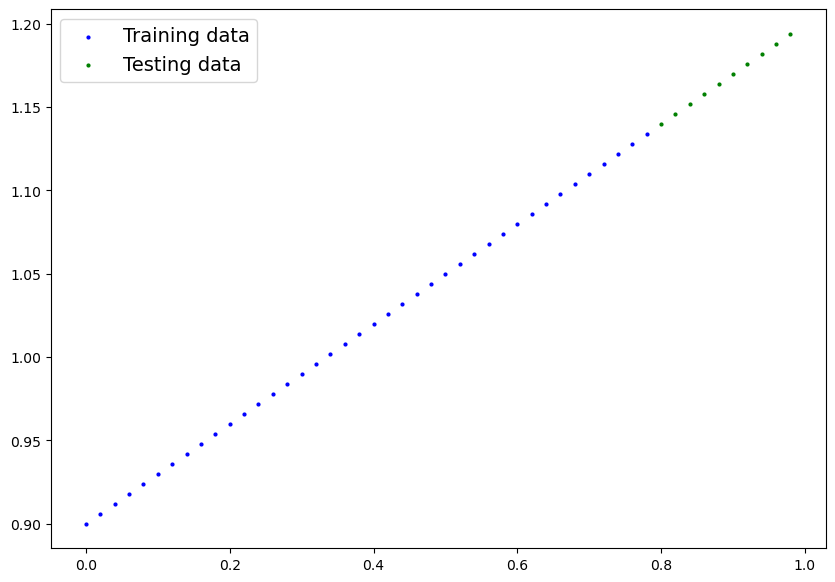

In [15]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


plot_predictions();
